使用Python的数值方法（scipy）
=====================================

总览
--------

核心Python语言（包括标准库）提供了足够的功能来执行计算研究任务。但是，有专用的（第三方）Python库提供扩展的功能，这些功能

- 为经常发生的任务提供数值工具

- 使用方便

- 在CPU时间和内存需求方面，比仅使用代码Python功能更有效。

我们特别列出了三个这样的模块：

- “ numpy”模块提供了专门用于向量和矩阵“数字运算”的数据类型（这是[14-numpy.ipynb]（14-numpy。中引入的“ numpy”提供的“数组”类型）。 ipynb））和线性代数工具。

- “ matplotlib”软件包（也称为“ pylab”）提供了绘图和可视化功能（请参阅[15-visualising-data.ipynb]（15-visualising-data.ipynb））和

- `scipy`软件包（SCIentific PYthon），它提供了多种数值算法，并将在本章中介绍。

通过scipy和numpy可用的许多数值算法是由已建立的编译库提供的，这些库通常用Fortran或C编写。因此，它们的执行速度比纯Python代码（解释后）要快得多。根据经验，我们希望编译后的代码比纯Python代码快两个数量级。

您可以对每种数值方法使用帮助功能，以查找有关实现源的更多信息。

科学
-----

Scipy是建立在numpy之上的。来自numpy的所有功能似乎也可以在scipy中使用。例如，代替

In [1]:
import numpy
x = numpy.arange(0, 10, 0.1)
y = numpy.sin(x)

为此我们也可以使用

In [2]:
import scipy as s
x = s.arange(0, 10, 0.1)
y = s.sin(x)

首先，我们需要导入`scipy`：

In [3]:
import scipy

当我们使用help命令时，`scipy`包会提供有关其自身结构的信息：

```python
help(scipy)
```

输出非常长，因此我们在这里仅显示其中的一部分：

    stats       --- Statistical Functions [*]
    sparse      --- Sparse matrix [*]
    lib         --- Python wrappers to external libraries [*]
    linalg      --- Linear algebra routines [*]
    signal      --- Signal Processing Tools [*]
    misc        --- Various utilities that don't have another home.
    interpolate --- Interpolation Tools [*]
    optimize    --- Optimization Tools [*]
    cluster     --- Vector Quantization / Kmeans [*]
    fftpack     --- Discrete Fourier Transform algorithms [*]
    io          --- Data input and output [*]
    integrate   --- Integration routines [*]
    lib.lapack  --- Wrappers to LAPACK library [*]
    special     --- Special Functions [*]
    lib.blas    --- Wrappers to BLAS library [*]
      [*] - using a package requires explicit import (see pkgload)

如果我们正在寻找一种集成功能的算法，则可以探索`集成`包：

```python
import scipy.integrate

scipy.integrate?
```

输出:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Integrators of ODE systems
==========================

.. autosummary::
   :toctree: generated/

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.
   complex_ode   -- Convert a complex-valued ODE to real-valued and integrate.
```

以下各节显示了示例，这些示例演示了如何使用`scipy`提供的算法。

数值积分
---------------------

Scientific Python提供了许多集成例程。解决这类积分*I*的通用工具

$$I=\int_a^b f(x) \mathrm{d} x$$

由`scipy.integrate`模块的`quad（）`函数提供。

它以要积分的函数*f*（*x*）（“被积数”）以及上下限*a*和*作为输入参数。 b*。它返回两个值（以元组形式）：第一个是计算的结果，第二个是对该结果的数值误差的估计。

这是一个示例：产生以下输出：

In [3]:
# NBVAL_IGNORE_OUTPUT
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 17.864264 (+-1.55117e-11)


注意，`quad（）`采用可选参数`epsabs`和`epsrel`来增加或降低其计算精度。 （使用`help（quad）`了解更多信息。）默认值为`epsabs = 1.5e-8`和`epsrel = 1.5e-8`。对于下一个练习，默认值已足够。

### 练习：整合功能

1.使用scipy的`quad`函数，编写一个程序，以数字方式求解以下整数：$I = \int
_0^1\cos(2\pi x) dx$。

2.找到解析积分并将其与数值解进行比较。

3.为什么对数字积分的准确性（或误差）进行估计很重要？

### 练习：整合之前先作图

在尝试进行积分之前，最好对被积函数进行绘图以检查其是否“表现良好”。很难用数值处理奇异性（即，mathis2趋向于负或正无穷大的mathis1值）或其他接近mathis4的不规则行为（例如mathis3）。

1.编写一个名为`plotquad`的函数，该函数采用与quad命令相同的参数（*即* $f$，mathis6和$b$），并且
2.（i）创建被积数$f(x)$的图，并
3.（ii）使用“ quad”函数以数值方式计算积分。返回值应与“ quad”函数相同。

解常微分方程
---------------------------------------

解该类型的常微分方程
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t)$$

对于给定的$y(t_0)=y_0$，我们可以使用`scipy`的`odeint`函数。这是一个（自我解释）示例程序（“ useodeint.py”），用于查找

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
 给定这个微分方程：
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

Text(0,0.5,'y(t)')

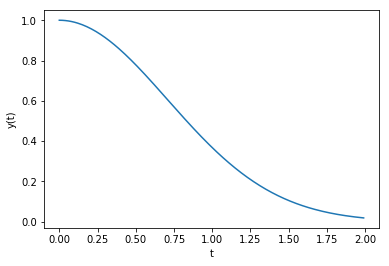

In [5]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as N

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = N.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)

import pylab          # plotting of results
pylab.plot(t, y)
pylab.xlabel('t'); pylab.ylabel('y(t)')

`odeint`命令采用许多可选参数来更改集成的默认错误容限（并触发产生额外的调试输出）。使用help命令来探索以下内容：

```python
help(scipy.integrate.odeint)
```

将会得到:

```
Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to function.
    Dfun : callable(y, t0, ...)
        Gradient (Jacobian) of `func`.
    col_deriv : bool, optional
        True if `Dfun` defines derivatives down columns (faster),
        otherwise `Dfun` should define derivatives across rows.
    full_output : bool, optional
        True if to return a dictionary of optional outputs as the second output
    printmessg : bool, optional
        Whether to print the convergence message
    
    Returns
    -------
    y : array, shape (len(t), len(y0))
        Array containing the value of y for each desired time in t,
        with the initial value `y0` in the first row.
    infodict : dict, only returned if full_output == True
        Dictionary containing additional output information
    
        =======  ============================================================
        key      meaning
        =======  ============================================================
        'hu'     vector of step sizes successfully used for each time step.
        'tcur'   vector with the value of t reached for each time step.
                 (will always be at least as large as the input times).
        'tolsf'  vector of tolerance scale factors, greater than 1.0,
                 computed when a request for too much accuracy was detected.
        'tsw'    value of t at the time of the last method switch
                 (given for each time step)
        'nst'    cumulative number of time steps
        'nfe'    cumulative number of function evaluations for each time step
        'nje'    cumulative number of jacobian evaluations for each time step
        'nqu'    a vector of method orders for each successful step.
        'imxer'  index of the component of largest magnitude in the
                 weighted local error vector (e / ewt) on an error return, -1
                 otherwise.
        'lenrw'  the length of the double work array required.
        'leniw'  the length of integer work array required.
        'mused'  a vector of method indicators for each successful time step:
                 1: adams (nonstiff), 2: bdf (stiff)
        =======  ============================================================
    
    Other Parameters
    ----------------
    ml, mu : int, optional
        If either of these are not None or non-negative, then the
        Jacobian is assumed to be banded.  These give the number of
        lower and upper non-zero diagonals in this banded matrix.
        For the banded case, `Dfun` should return a matrix whose
        rows contain the non-zero bands (starting with the lowest diagonal).
        Thus, the return matrix `jac` from `Dfun` should have shape
        ``(ml + mu + 1, len(y0))`` when ``ml >=0`` or ``mu >=0``.
        The data in `jac` must be stored such that ``jac[i - j + mu, j]``
        holds the derivative of the `i`th equation with respect to the `j`th
        state variable.  If `col_deriv` is True, the transpose of this
        `jac` must be returned.
    rtol, atol : float, optional
        The input parameters `rtol` and `atol` determine the error
        control performed by the solver.  The solver will control the
        vector, e, of estimated local errors in y, according to an
        inequality of the form ``max-norm of (e / ewt) <= 1``,
        where ewt is a vector of positive error weights computed as
        ``ewt = rtol * abs(y) + atol``.
        rtol and atol can be either vectors the same length as y or scalars.
        Defaults to 1.49012e-8.
    tcrit : ndarray, optional
        Vector of critical points (e.g. singularities) where integration
        care should be taken.
    h0 : float, (0: solver-determined), optional
        The step size to be attempted on the first step.
    hmax : float, (0: solver-determined), optional
        The maximum absolute step size allowed.
    hmin : float, (0: solver-determined), optional
        The minimum absolute step size allowed.
    ixpr : bool, optional
        Whether to generate extra printing at method switches.
    mxstep : int, (0: solver-determined), optional
        Maximum number of (internally defined) steps allowed for each
        integration point in t.
    mxhnil : int, (0: solver-determined), optional
        Maximum number of messages printed.
    mxordn : int, (0: solver-determined), optional
        Maximum order to be allowed for the non-stiff (Adams) method.
    mxords : int, (0: solver-determined), optional
        Maximum order to be allowed for the stiff (BDF) method.
    
    See Also
    --------
    ode : a more object-oriented integrator based on VODE.
    quad : for finding the area under a curve.
    
    Examples
    --------
    The second order differential equation for the angle `theta` of a
    pendulum acted on by gravity with friction can be written::
    
        theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
    
    where `b` and `c` are positive constants, and a prime (') denotes a
    derivative.  To solve this equation with `odeint`, we must first convert
    it to a system of first order equations.  By defining the angular
    velocity ``omega(t) = theta'(t)``, we obtain the system::
    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
    
    Let `y` be the vector [`theta`, `omega`].  We implement this system
    in python as:
    
    >>> def pend(y, t, b, c):
    ...     theta, omega = y
    ...     dydt = [omega, -b*omega - c*np.sin(theta)]
    ...     return dydt
    ...
    
    We assume the constants are `b` = 0.25 and `c` = 5.0:
    
    >>> b = 0.25
    >>> c = 5.0
    
    For initial conditions, we assume the pendulum is nearly vertical
    with `theta(0)` = `pi` - 0.1, and it initially at rest, so
    `omega(0)` = 0.  Then the vector of initial conditions is
    
    >>> y0 = [np.pi - 0.1, 0.0]
    
    We generate a solution 101 evenly spaced samples in the interval
    0 <= `t` <= 10.  So our array of times is:
    
    >>> t = np.linspace(0, 10, 101)
    
    Call `odeint` to generate the solution.  To pass the parameters
    `b` and `c` to `pend`, we give them to `odeint` using the `args`
    argument.
    
    >>> from scipy.integrate import odeint
    >>> sol = odeint(pend, y0, t, args=(b, c))
    
    The solution is an array with shape (101, 2).  The first column
    is `theta(t)`, and the second is `omega(t)`.  The following code
    plots both components.
    
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
    >>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
    >>> plt.legend(loc='best')
    >>> plt.xlabel('t')
    >>> plt.grid()
    >>> plt.show()

```

### 练习：使用`odeint`

1.在文本编辑器中打开一个名为`testodeint.py`文件的新文件。

2.编写一个程序，使用`odeint`算法计算此ODE的解*y*（*t*）：
    $$\frac{\mathrm{d}y}{\mathrm{d}t} =  -\exp(-t)(10\sin(10t)+\cos(10t))$$
     从$t=0$到$t = 10$。初始值为$y(0)=1$。

3.您应该在点$t=0$，mathis6，mathis7，...，mathis8，mathis9处以图形方式显示解决方案。

提示：解决方案$y(t)$的一部分如下图所示。

<img src="static/images/odeintsolution8to10.png" alt="image" style="width:100.0%" />

求解方程的根
------------

如果您尝试找到一个$x$这样
$$f(x)=0$$
那么这称为*根查找*。请注意，像$g(x)=h(x)$之类的问题属于此类别，因为您可以将其重写为$f(x)=g(x)−h(x)=0$。

`scipy`的`optimize`模块中提供了许多根查找工具。

### 使用二等分法求根

首先，我们介绍`bisect`算法，该算法具有（i）鲁棒性和（ii）缓慢但在概念上非常简单的特点。

假设我们需要计算*f*(*x*)=*x*<sup>3</sup> − 2*x*<sup>2</sup>的根。此函数在*x* = 0处有一个（双）根（这是微不足道的），另一个根在*x* = 1.5之间（其中*f* （1.5）＝-1.125）和*x* ＝ 3（其中*f*（3）＝ 9）。可以很容易地看到另一个根位于*x* = 2。这是一个数字确定该根的程序：

In [4]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


bisect（）方法采用三个强制性参数：（i）函数*f*（*x*），（ii）下限*a*（为此我们在示例中选择了1.5）和（ii）上限*b*（为此我们选择了3）。可选参数`xtol`确定方法的最大错误。

二等分方法的要求之一是，必须选择间隔\[*a*, *b*\]，使得函数在*a*处为正，在*b*处为负，或者函数在*a*<*a*，并在*b*处为正。换句话说：*a*和*b*必须包含根。

### 练习：使用bisect方法查找根

1.编写一个名为`sqrttwo.py`的程序，通过使用二等分算法找到函数$f(x)=2 − x^2$的根*x*来确定$\sqrt{2}$的近似值。为10<sup>-8</sup>的根的近似值选择一个公差。

2.记录对根的初始括号$[a, b]$的选择：为*a*和*b*选择了哪些值，为什么？

3.研究结果：

- 二等分算法返回根*x*的哪个值？

- 使用“ math.sqrt（2）”计算$\\sqrt{2}$的值，并将其与根的近似值进行比较。*x*的绝对误差有多大？与`xtol`相比如何？

### 使用`fsolve`求函数的根

在通用的`fsolve（）`函数中，为了实现（多维）函数的根查找，实现了一种比对分算法更好的（通常是“更有效”的）算法。该算法仅需要一个靠近根的可疑位置的起点（但不能保证收敛）。

这是一个例子：

In [7]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, 3)           # one root is at x=2.0

print("The root x is approximately x=%21.19g" % x)
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.000000000000006661
The exact error is -6.66134e-15.


`fsolve`的返回值[6]是一个长度为*n*的numpy数组，用于带有*n*变量的寻根问题。在上面的示例中，我们有*n* = 1。

插值
-------------

给定一组带有$i = 1, 2, …N$的*N*点$(x_i, y_i)$，我们有时需要一个函数$\hat{f}(x)$，该函数返回$y_i = f(x_i)$，其中$x == x_i$，并且还为所有$x$提供了数据$(x_i, y_i)$的插值。

函数y0 = scipy.interpolate.interp1d（x，y，kind =“ nearest”）会根据不同阶的样条进行此插值。请注意，函数`interp1d`返回*函数*`y0`，然后将其以$y0(x)$的形式内插给定给定$x$的x-y数据。

下面的代码对此进行了演示，并显示了不同的插值类型。

Text(0.5,0,'x')

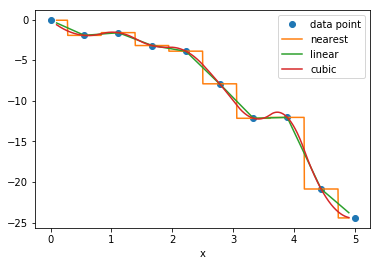

In [8]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

曲线拟合
-------------

我们已经在[numpy章节]（14-numpy.ipynb）中看到，可以使用numpy.polyfit函数通过数据集拟合多项式函数。在这里，我们介绍一种更为通用的曲线拟合算法。

Scipy通过`scipy.optimize.curve_fit`提供了某种通用的功能（基于Levenburg-Marquardt算法），以将给定的（Python）函数适合给定的数据集。假设我们已经得到了一组数据，这些数据的点为$x_1, x_2, …x_N$，具有对应的函数值$y_i$，并且$y_i$对$x_i$的依赖性为$y_i=f(x_i,\vec{p})$。我们要确定参数向量$\vec{p}=(p_1, p_2, \ldots,
p_k)$，以使$r$（残差之和）尽可能小：

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

如果数据嘈杂，曲线拟合将特别有用：对于给定的$x_i$和$y_i=f(x_i,\vec{p})$，我们有一个（未知）误差项$\epsilon_i$，因此$y_i=f(x_i,\vec{p})+\epsilon_i$。

我们使用以下示例进行说明：
$$f(x,\vec{p}) = a \exp(-b x) + c, \quad\mathrm{i.e.}\quad \vec{p}=\mathtt{a,b,c}$$

Optimal parameters are a=2.55013, b=1.29813, and c=0.500269


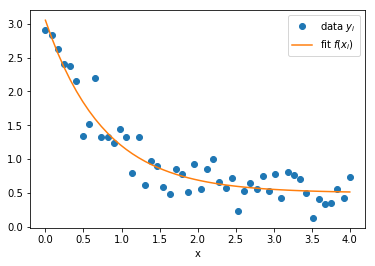

In [9]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
import pylab
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='data $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.legend()

Note that in the source code above we define the fitting function $y = f(x)$ through Python code. We can thus fit (nearly) arbitrary functions using the `curve_fit` method.

The `curve_fit` function returns a tuple `popt, pcov`. The first entry `popt` contains a tuple of the OPTimal Parameters (in the sense that these minimise equation (\[eq:1\]). The second entry contains the covariance matrix for all parameters. The diagonals provide the variance of the parameter estimations.

For the curve fitting process to work, the Levenburg-Marquardt algorithm needs to start the fitting process with initial guesses for the final parameters. If these are not specified (as in the example above), the value “1.0“ is used for the initial guess.

If the algorithm fails to fit a function to data (even though the function describes the data reasonably), we need to give the algorithm better estimates for the initial parameters. For the example shown above, we could give the estimates to the `curve_fit` function by changing the line

```python
popt, pcov = curve_fit(f, x, yi)
```

to

```python
popt, pcov = curve_fit(f, x, yi, p0=(2,1,0.6))
```

请注意，在上面的源代码中，我们通过Python代码定义了拟合函数$y = f(x)$。因此，我们可以使用`curve _fit`方法拟合（几乎）任意函数。

`curve_ fit`函数返回一个元组 `popt，pcov`。第一个条目`popt`包含一个 OPTimal 参数的元组（就这些最小化方程式（\[eq:1\]）而言。第二个条目包含所有参数的协方差矩阵。对角线提供了参数估计的方差。

为了使曲线拟合过程正常进行，Levenburg-Marquardt算法需要使用初始猜测最终参数来开始拟合过程。如果未指定（如上例所示），则将值“ 1.0”用于初始猜测。

如果算法无法使函数适合数据（即使函数合理地描述了数据），我们需要为算法提供更好的初始参数估计。对于上面显示的示例，我们可以通过更改行来将估计值提供给`curve_fit`函数


```python
popt, pcov = curve_fit(f, x, yi)
```

至

```python
popt, pcov = curve_fit(f, x, yi, p0=(2,1,0.6))
```

如果我们最初的猜测是*a* = 2，*b* = 1和*c* = 0.6。一旦在参数空间中采用“大致在正确区域内”的算法，拟合通常会很好地工作。

傅立叶变换
------------------

在下一个示例中，我们创建一个信号作为50 Hz和70 Hz正弦波的叠加（它们之间略有相移）。然后，我们对信号进行傅立叶变换，并针对频率绘制（复杂）离散傅立叶变换系数的绝对值，并期望看到50Hz和70Hz处的峰值。

Text(0,0.5,'abs(DFT(signal))')

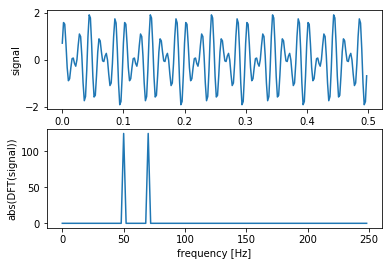

In [10]:
import scipy
import matplotlib.pyplot as plt
pi = scipy.pi

signal_length = 0.5   #[seconds]
sample_rate=500       #sampling rate [Hz]
dt = 1./sample_rate   #time between two samples [s]

df = 1/signal_length  #frequency between points in
                      #in frequency domain [Hz] 
t=scipy.arange(0,signal_length,dt) #the time vector
n_t=len(t)            #length of time vector

#create signal
y=scipy.sin(2*pi*50*t)+scipy.sin(2*pi*70*t+pi/4)

#compute fourier transform
f=scipy.fft(y)

#work out meaningful frequencies in fourier transform
freqs=df*scipy.arange(0,(n_t-1)/2.,dtype='d') #d=double precision float
n_freq=len(freqs)

#plot input data y against time
plt.subplot(2,1,1)
plt.plot(t,y,label='input data')
plt.xlabel('time [s]')
plt.ylabel('signal')

#plot frequency spectrum 
plt.subplot(2,1,2)
plt.plot(freqs,abs(f[0:n_freq]),
         label='abs(fourier transform)')
plt.xlabel('frequency [Hz]')
plt.ylabel('abs(DFT(signal))')

下图显示了根据上图显示的数据计算出的离散傅立叶变换。

优化
------------

通常，我们需要找到特定函数的最大值或最小值*f*（*x*），其中*f*是标量函数，但是*x*可以是一个向量。典型的应用是最小化诸如成本，风险和错误之类的实体，或者最大化生产力，效率和利润。优化例程通常提供一种最小化给定函数的方法：如果需要最大化*f*（*x*），我们创建一个新函数*g*（*x*）反转 *f*  的符号，即*g*(*x*)= − *f*(*x*)，并最小化*g*(*x*)。

下面，我们提供一个示例，显示（i）测试函数的定义和（ii）调用`scipy.optimize.fmin`函数，该函数将函数*f*作为参数以最小化，并以值*x*<sub>0</sub>，从该值开始搜索最小值，并返回*x*的值，而*f*（*x*） （本地）最小化。通常，对最小值的搜索是局部搜索，即算法遵循局部梯度。我们重复搜索两个值的最小值（分别为*x*<sub>0</sub> = 2.0），以证明根据起始值，我们可能会找到不同的最小值功能 *f*。

文件`fmin1.py`中的大多数命令（在两次调用`fmin`之后）都会创建函数图，搜索的起点和获得的最小值：

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


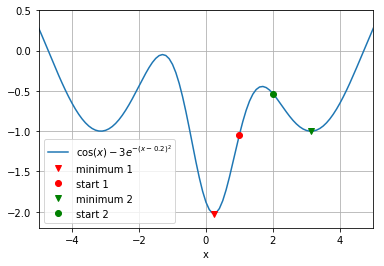

In [11]:
from scipy import arange, cos, exp
from scipy.optimize import fmin
import pylab

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function
x = arange(-10, 10, 0.1)
y = f(x)
pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# add minimum1 to plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimum 1')
# add start1 to plot
pylab.plot(1.0, f(1.0), 'or', label='start 1')

# add minimum2 to plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimum 2')
# add start2 to plot
pylab.plot(2.0,f(2.0),'og',label='start 2')

pylab.legend(loc='lower left')

调用`fmin`函数将产生一些诊断输出，您也可以在上面看到。

##### 返回值fmin

请注意，函数`fmin`的返回值是一个numpy数组，在上面的示例中，该数组仅包含一个数字，因为我们只有一个参数（此处为*x*）可以变化。通常，如果有多个参数，则可以使用`fmin`在更高维的参数空间中找到最小值。在这种情况下，numpy数组将包含最小化目标函数的那些参数。即使有更多参数，目标函数$f(x)$也必须返回标量，即即使$x$是向量（如$f(\mathbf{x})$）。

其他数值方法
-----------------------

Scientific Python和Numpy提供了对许多其他数值算法的访问，包括函数插值，傅里叶变换，优化，特殊函数（例如Bessel函数），信号处理和滤波器，随机数生成等。使用“帮助”功能和网络上提供的文档开始探索`scipy`和`numpy`的功能。

scipy.io：Scipy输入输出
----------------------------

Scipy提供了读取和写入Matlab`mat`文件的例程。这是一个示例，其中我们创建一个存储（1x11）矩阵的Matlab兼容文件，然后使用scipy Input-Output库将该数据从Python读取到numpy数组中：

首先，我们在Octave中创建一个Mat文件（Octave与Matlab兼容\[mostly\]）：

```octave
octave:1> a=-1:0.5:4
a =
Columns 1 through 6:
   -1.0000   -0.5000    0.0000    0.5000    1.0000    1.5000    
Columns 7 through 11:
   2.0000    2.5000   3.0000    3.5000    4.0000
octave:2> save -6 octave_a.mat a       %save as version 6
```

然后我们在python中加载此数组：

In [12]:
from scipy.io import loadmat
mat_contents = loadmat('static/data/octave_a.mat')

In [13]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Aug  8 12:21:36 2016',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])}

In [14]:
mat_contents['a']

array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])

函数`loadmat`返回一个字典：字典中每个项目的键都是一个字符串，它是数组在Matlab中保存时的名称。关键是实际的数组。

Matlab矩阵文件可以包含多个数组。其中的每一个都由字典中的一对键值对表示。

让我们从Python中保存两个数组，以证明这一点：

In [15]:
import scipy.io
import numpy as np

# create two numpy arrays
a = np.linspace(0, 50, 11)
b = np.ones((4, 4))

# save as mat-file
# create dictionary for savemat
tmp_d = {'a': a,
         'b': b}
scipy.io.savemat('data.mat', tmp_d)

该程序创建文件“ data.mat”，随后我们可以使用Matlab或此处的Octave进行读取：

    HAL47:code fangohr$ octave
    GNU Octave, version 3.2.4
    Copyright (C) 2009 John W. Eaton and others.
    <snip>

    octave:1> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           ans         1x11                        92  cell

    Total is 11 elements using 92 bytes

    octave:2> load data.mat
    octave:3> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           a          11x1                         88  double
           ans         1x11                        92  cell
           b           4x4                        128  double

    Total is 38 elements using 308 bytes

    octave:4> a
    a =

        0
        5
       10
       15
       20
       25
       30
       35
       40
       45
       50

    octave:5> b
    b =

       1   1   1   1
       1   1   1   1
       1   1   1   1
       1   1   1   1

注意，还有其他功能可以读取和写入，如IDL，Netcdf和`scipy.io`中的其他格式所使用的格式。

更多→请参阅[Scipy教程](http://docs.scipy.org/doc/scipy/reference/tutorial/io.html)。